## Some obervations of $N' = rN(1 - \frac{N}{k\alpha})$ 
Where N = population density, r = growth rate, k = carrying capacity, $\alpha$ = stochastic parameter

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [5]:
# Parameters
r = 0.1
K = 1000
y0 = 100
alpha_mean = 1.0
alpha_std = 0.1
sigma = 0.1

In [6]:
# Time parameters
t_start = 0
t_end = 3650
num_points = 5000
dt = (t_end - t_start) / num_points

### Euler-Maruyama Method

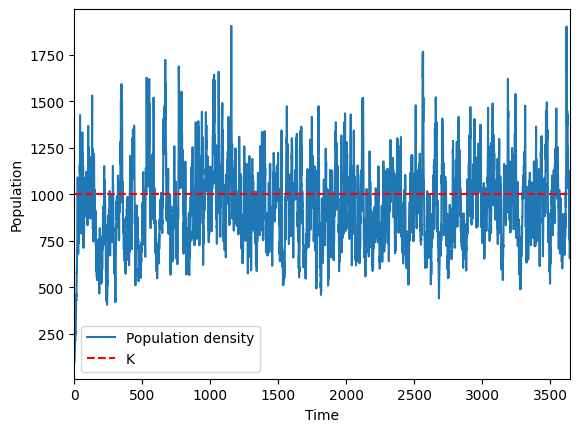

In [10]:
# Generate Wiener increments
dW = np.sqrt(dt) * np.random.randn(num_points)

# Generate alpha values with some stochasticity
alpha_values = alpha_mean + alpha_std * np.random.randn(num_points)

# Initialize arrays
t = np.linspace(t_start, t_end, num_points)
y = np.zeros_like(t)
y[0] = y0

# Euler-Maruyama method
for i in range(1, num_points):
    drift = r * y[i-1] * (1 - y[i-1] / (alpha_values[i] * K)) * dt
    diffusion = sigma * y[i-1] * dW[i-1]
    y[i] = y[i-1] + drift + diffusion

# Plot the solution
plt.plot(t, y, label='Population density')
plt.axhline(K, label='K', linestyle='--', color='red')
plt.xlabel('Time')
plt.ylabel('Population')
plt.xlim(0, t_end)
# plt.title('Stochastic Logistic Growth with Euler-Maruyama Method')
plt.legend()
plt.show()

## Monte-Carlo Simultion on Carryng Capacity

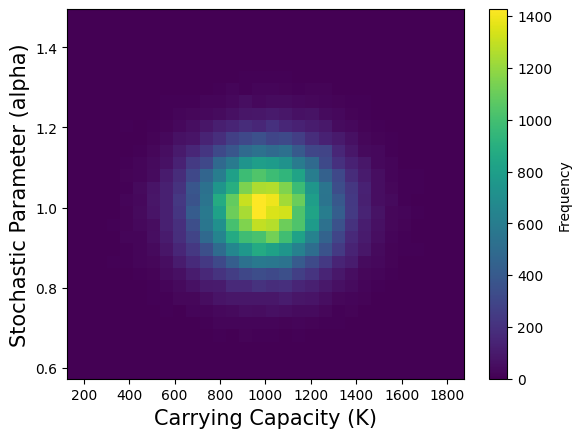

In [18]:
# Logistic growth model with stochastic parameter and carrying capacity
def logistic_growth_stochastic_k(N, t, r, K, alpha):
    dNdt = r * N * (1 - N / (alpha * K))
    return dNdt

# Monte Carlo simulation
def monte_carlo_simulation_stochastic_k(num_simulations):
    carrying_capacity_samples = []

    for _ in range(num_simulations):
        # Randomly sample parameters (in this example, using normal distribution)
        r_sample = np.random.normal(mean_r, std_r)
        K_sample = np.random.normal(mean_K, std_K)
        alpha_sample = np.random.normal(mean_alpha, std_alpha)

        # Initial population size
        N0 = np.random.uniform(low=0, high=0.1 * K_sample)

        # Time points for simulation
        t = np.linspace(0, max_time, num_time_points)

        # Solve ODE
        solution = odeint(logistic_growth_stochastic_k, N0, t, args=(r_sample, K_sample, alpha_sample))

        # Extract carrying capacity estimate (final population size)
        carrying_capacity_estimate = solution[-1, 0]
        carrying_capacity_samples.append((r_sample, K_sample, alpha_sample, carrying_capacity_estimate))

    return np.array(carrying_capacity_samples)

# Parameters
mean_r, std_r = 0.1, 0.02  # Mean and standard deviation for growth rate
mean_K, std_K = 1000, 200  # Mean and standard deviation for carrying capacity
mean_alpha, std_alpha = 1, 0.1  # Mean and standard deviation for stochastic parameter
max_time = 50  # Maximum simulation time
num_time_points = 100  # Number of time points in simulation

# Number of Monte Carlo simulations
num_simulations = 100000

# Run Monte Carlo simulation
carrying_capacity_samples = monte_carlo_simulation_stochastic_k(num_simulations)

# Create a heatmap
# plt.figure(figsize=(12, 8))
plt.hist2d(carrying_capacity_samples[:, 1], carrying_capacity_samples[:, 2], bins=30, cmap='viridis')
plt.colorbar(label='Frequency')
plt.xlabel('Carrying Capacity (K)', fontsize=15)
plt.ylabel('Stochastic Parameter (alpha)', fontsize=15)

# plt.title('2D Histogram (Heatmap) of Carrying Capacity and Stochastic Parameter')
plt.show()

## Monte-Carlo Simulation on growth rate and carrying capacity

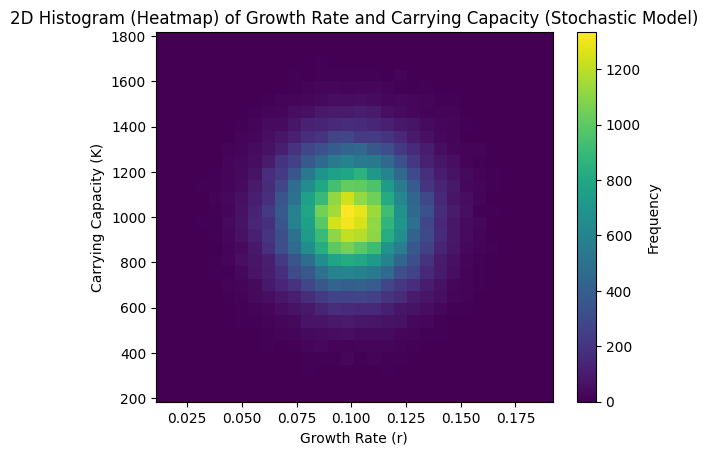

In [20]:
# Logistic growth model with stochastic parameter
def logistic_growth_stochastic(N, t, r, K, alpha):
    dNdt = r * N * (1 - N / (alpha * K))
    return dNdt

# Monte Carlo simulation
def monte_carlo_simulation_stochastic(num_simulations):
    carrying_capacity_samples = []

    for _ in range(num_simulations):
        # Randomly sample parameters (in this example, using normal distribution)
        r_sample = np.random.normal(mean_r, std_r)
        K_sample = np.random.normal(mean_K, std_K)
        alpha_sample = np.random.normal(mean_alpha, std_alpha)

        # Initial population size
        N0 = np.random.uniform(low=0, high=0.1 * K_sample)

        # Time points for simulation
        t = np.linspace(0, max_time, num_time_points)

        # Solve ODE
        solution = odeint(logistic_growth_stochastic, N0, t, args=(r_sample, K_sample, alpha_sample))

        # Extract carrying capacity estimate (final population size)
        carrying_capacity_estimate = solution[-1, 0]
        carrying_capacity_samples.append((r_sample, K_sample, alpha_sample, carrying_capacity_estimate))

    return np.array(carrying_capacity_samples)

# Parameters
mean_r, std_r = 0.1, 0.02  # Mean and standard deviation for growth rate
mean_K, std_K = 1000, 200  # Mean and standard deviation for carrying capacity
mean_alpha, std_alpha = 1, 0.1  # Mean and standard deviation for stochastic parameter
max_time = 50  # Maximum simulation time
num_time_points = 100  # Number of time points in simulation

# Number of Monte Carlo simulations
num_simulations = 100000

# Run Monte Carlo simulation
carrying_capacity_samples = monte_carlo_simulation_stochastic(num_simulations)

# Create a heatmap
# plt.figure(figsize=(12, 8))
plt.hist2d(carrying_capacity_samples[:, 0], carrying_capacity_samples[:, 1], bins=30, cmap='viridis')
plt.colorbar(label='Frequency')
plt.xlabel('Growth Rate (r)')
plt.ylabel('Carrying Capacity (K)')
plt.title('2D Histogram (Heatmap) of Growth Rate and Carrying Capacity (Stochastic Model)')
plt.show()